# Part I - PISA 2022 Database Exploration 
## *School students questionnaire data covering more than 80 countries*
## by Madina Madeyeva

## Introduction
> PISA 2022 Database represents questionnaire results of school children conducted in more than 80 countries. This database contains student, teacher, parent questionnaire data. As part of this report we will focus only on analyzing **Student** survey results.
> 
> Similar datasets are available for various years and we have decided to focus on 2022 specifically (compared to 2018) due to the following factors:
> 1. 2018 Database contains disclaimer regarding the quality of data:
> "* Due to issues identified during data adjudication, caution is required when analysing these data. For further information, see Annexes A4 and A6 of PISA 2018 Results (Volume I)."
> 2. 2022 year is more recent and relevant one to derive insights related to student life characteristics.
>    
> The data can be found and downloaded via the following website: https://www.oecd.org/en/data/datasets/pisa-2022-database.html
>
> In the below Report the focus was more on implementing various visualization techniques, in addition to performing data analysis on PISA 2022 dataset.

## Preliminary Wrangling

#### Required packages for this report:

In [ ]:
!pip install pandas openpyxl
pip install plotly
pip install matplotlib numpy

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pyreadstat
import plotly.express as px

%matplotlib inline

> Notes related to data load:
> 
> PISA 2022 dataset is related to student questionnaire results: stored in SAV/SPSS format and available via https://webfs.oecd.org/pisa2022/STU_QQQ_SPSS.zip
> 
> Dataset size is significant, the original dataset contains >600,000 entries and > 1,200 columns, each representing various questions asked to students and their parents.
> 
> For the purpose of this analysis:
>> we have selected >30 questions relevant for this report,
>> 
>> performed data wrangling activities and stored cleaned data in csv format,
>> 
>> used stored and cleaned csv files for further processing to ensure speed performance of the notebook.
>> 
> **IMPORTANT** Database questions and answers are encoded to certain standardized values, which can be read and reproduced using additional mapping table, available via Excel https://webfs.oecd.org/pisa2022/CY08MSP_CODEBOOK_27thJune24.xlsx.
>> Each question has unique identifiers (e.g. ST253Q01JA), which then should be connected to the correct description (How many [digital devices] with screens are there in your [home]?) using a separate Excel file. Example of a column name is 'ST004D01T' from the main database, which refers to a question: 'Student (Standardized) Gender' - available via mapping in Excel
>> 
>> Example of values from the main database: 1 and 2, which refer to the following answers: 1 - Female, 2 - Male
>> 
> For the purpose of this analysis we used two cleaned datasets:
>> 1) with string values for answers, such as Female and Male
>> 
>> 2) with numeric value equivalents of the same dataset (as per original dataset), such as 7-13 for Student International Grade (Derived) or 1-2 for Gender

In [2]:
# Load of the main database
df, meta = pyreadstat.read_sav('CY08MSP_STU_QQQ.SAV')

In [3]:
df.head(5)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,000800,ALB03,0080000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,000800,ALB03,0080000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,000800,ALB01,0080000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,000800,ALB08,0080000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,000800,ALB03,0080000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [260]:
# df.info(100)

In [5]:
# Load of a mapping Excel, with the description of questions and answers
df_desc = pd.read_excel('CY08MSP_CODEBOOK_27thJune24.xlsx', sheet_name='CY08MSP_STU_QQQ') 

In [17]:
df_desc.iloc[[2206,2207,2208,2209,2210,2211,2212,2213,2214,2215]]

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2206,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,NaN,NaN,NaN,NaN
2207,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,305759.0,49.8187
2208,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,307906.0,50.1685
2209,NaN,NaN,NaN,NaN,NaN,NaN,.V/95,Valid Skip,0.0,0.0000
2210,NaN,NaN,NaN,NaN,NaN,NaN,.N/97,Not Applicable,79.0,0.0129
2211,NaN,NaN,NaN,NaN,NaN,NaN,.I/98,Invalid,0.0,0.0000
2212,NaN,NaN,NaN,NaN,NaN,NaN,.M/99,No Response,0.0,0.0000
2213,NaN,NaN,NaN,NaN,NaN,NaN,SYSTEM MISSING,Missing,0.0,0.0000
2214,ST250Q01JA,Which of the following are in your [home]: A r...,NUM,2.0,27.0,1.0-2.0,NaN,NaN,NaN,NaN
2215,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,459439.0,74.8584


As it is seen above, mapping Excel needs certain data wrangling activities. Specifically:

*Step 1* NAME and VARLABEL fields need to be replicated to the empty cells

In [19]:
# Fill empty cells in the first 6 columns with the previous row's values
df_desc.iloc[:, :6] = df_desc.iloc[:, :6].fillna(method='ffill')

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\1108982216.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_desc.iloc[:, :6] = df_desc.iloc[:, :6].fillna(method='ffill')


In [20]:
df_desc.iloc[[2206,2207,2208,2209,2210,2211,2212,2213,2214,2215]]

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
2206,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,NaN,NaN,NaN,NaN
2207,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,1,Female,305759.0,49.8187
2208,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,2,Male,307906.0,50.1685
2209,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,.V/95,Valid Skip,0.0,0.0000
2210,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,.N/97,Not Applicable,79.0,0.0129
2211,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,.I/98,Invalid,0.0,0.0000
2212,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,.M/99,No Response,0.0,0.0000
2213,ST004D01T,Student (Standardized) Gender,NUM,1.0,26.0,1.0-2.0,SYSTEM MISSING,Missing,0.0,0.0000
2214,ST250Q01JA,Which of the following are in your [home]: A r...,NUM,2.0,27.0,1.0-2.0,NaN,NaN,NaN,NaN
2215,ST250Q01JA,Which of the following are in your [home]: A r...,NUM,2.0,27.0,1.0-2.0,1,Yes,459439.0,74.8584


*Step 2* Redundant rows for the header of every question and without any answer, need to be removed

In [21]:
# Remove rows where the 7th column (index 6) is empty
df_desc = df_desc.dropna(subset=[df_desc.columns[6]])

In [23]:
df_desc.head()

,NAME,VARLABEL,TYPE,FORMAT,VARNUM,MINMAX,VAL,LABEL,COUNT,PERCENT
1,CNT,Country code 3-character,CHAR,3.0,1.0,NaN,ALB,Albania,6129.0,0.9986
2,CNT,Country code 3-character,CHAR,3.0,1.0,NaN,ARE,United Arab Emirates,24600.0,4.0082
3,CNT,Country code 3-character,CHAR,3.0,1.0,NaN,ARG,Argentina,12111.0,1.9733
4,CNT,Country code 3-character,CHAR,3.0,1.0,NaN,AUS,Australia,13437.0,2.1893
5,CNT,Country code 3-character,CHAR,3.0,1.0,NaN,AUT,Austria,6151.0,1.0022


### Steps to clean the main dataset with student questionnare results

Step 1. Selecting relevant questions for our further analysis

In [24]:
df_slim = df[[
'CNT',
'ST001D01T',
'ST003D02T',
'ST003D03T',
'ST004D01T',
'ST250Q01JA',
'ST250Q02JA',
'ST250Q03JA',
'ST250Q04JA',
'ST250Q05JA',
'ST251Q06JA',
'ST253Q01JA',
'ST254Q01JA',
'ST254Q02JA',
'ST254Q03JA',
'ST254Q04JA',
'ST254Q05JA',
'ST254Q06JA',
'ST255Q01JA',
'ST230Q01JA',
'ST005Q01JA',
'ST007Q01JA',
'ST019AQ01T',
'ST294Q01JA',
'ST294Q02JA',
'ST294Q03JA',
'ST294Q04JA',
'ST294Q05JA',
'ST295Q01JA',
'ST295Q02JA',
'ST295Q03JA',
'ST295Q04JA',
'ST295Q05JA']]

In [25]:
# We have decided to drop missing answers in our database. Remaining answers (>400 000) are assumed to be significant from the statistical point of view
df_slim=df_slim.dropna()

In [26]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417524 entries, 3 to 613743
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CNT         417524 non-null  object 
 1   ST001D01T   417524 non-null  float64
 2   ST003D02T   417524 non-null  float64
 3   ST003D03T   417524 non-null  float64
 4   ST004D01T   417524 non-null  float64
 5   ST250Q01JA  417524 non-null  float64
 6   ST250Q02JA  417524 non-null  float64
 7   ST250Q03JA  417524 non-null  float64
 8   ST250Q04JA  417524 non-null  float64
 9   ST250Q05JA  417524 non-null  float64
 10  ST251Q06JA  417524 non-null  float64
 11  ST253Q01JA  417524 non-null  float64
 12  ST254Q01JA  417524 non-null  float64
 13  ST254Q02JA  417524 non-null  float64
 14  ST254Q03JA  417524 non-null  float64
 15  ST254Q04JA  417524 non-null  float64
 16  ST254Q05JA  417524 non-null  float64
 17  ST254Q06JA  417524 non-null  float64
 18  ST255Q01JA  417524 non-null  float64
 19  ST230Q0

In [27]:
# original dataset stores answers in float format, although they represent an integer, e.g. 1.0 vs 1 for Female.
# Below we convert to integer format to be able to correctly map with a Mapping table in df-desc
df_slim[df_slim.select_dtypes(include=['float']).columns] = df_slim.select_dtypes(include=['float']).round().astype('int')

In [28]:
df_slim.head()

,CNT,ST001D01T,ST003D02T,ST003D03T,ST004D01T,ST250Q01JA,ST250Q02JA,ST250Q03JA,ST250Q04JA,ST250Q05JA,...,ST294Q01JA,ST294Q02JA,ST294Q03JA,ST294Q04JA,ST294Q05JA,ST295Q01JA,ST295Q02JA,ST295Q03JA,ST295Q04JA,ST295Q05JA
3,ALB,8,7,2006,1,1,1,2,1,1,...,6,6,6,1,6,6,6,6,1,6
4,ALB,10,1,2006,1,1,1,1,1,1,...,1,6,3,1,2,6,6,3,1,2
6,ALB,10,5,2006,2,1,1,2,1,1,...,6,6,6,6,6,6,6,6,6,6
13,ALB,10,8,2006,2,1,2,2,1,1,...,6,6,5,1,4,6,6,6,1,6
14,ALB,10,7,2006,1,1,1,2,1,1,...,6,6,6,3,4,6,6,6,3,4


Below we will create two datasets:
1. with string form of replies, e.g. Grade 7
2. with numeric form of replies, e.g. 7 as per original dataset - to be able to perform quantitative analysis

In [29]:
# Dataset 1 with string replies
df_new=df_slim
# Melting the DataFrame, as preparation for mapping with Excel
df_new.reset_index(inplace=True)
melted_df = df_new.melt(id_vars='index', var_name='Column', value_name='Value')
melted_df.iloc[[600000]]

,index,Column,Value
600000,285303,ST001D01T,10


In [30]:
# Convert all relevant columns in the main dataset and the mapping table to string type required for mapping
melted_df['Column'] = melted_df['Column'].astype(str)
melted_df['Value'] = melted_df['Value'].astype(str)  # Convert Value to string

df_desc['NAME'] = df_desc['NAME'].astype(str)
df_desc['VAL'] = df_desc['VAL'].astype(str)  # Convert VAL to string

In [31]:
# Merging the dataframes with conditions on both Column and Value
result_df = melted_df.merge(df_desc[['NAME', 'VAL', 'LABEL','VARLABEL']], 
                             left_on=['Column', 'Value'], 
                             right_on=['NAME', 'VAL'], 
                             how='left')
result_df = result_df.drop(columns=['NAME', 'VAL','Value','Column'])
result_df.iloc[[800000]]

,index,LABEL,VARLABEL
800000,563177,Grade 11,Student International Grade (Derived)


In [32]:
# Pivoting the DataFrame to the original form, but with the correct answers:
pivoted_df = result_df.pivot(index='index', columns='VARLABEL', values='LABEL')

# Resetting the index to make it a regular column (optional)
pivoted_df.reset_index(inplace=True)

### Resulting Main dataset #1 with answers and questions in string format

In [33]:
pivoted_df.head()

VARLABEL,index,Country code 3-character,How many [digital devices] with screens are there in your [home]?,How many books are there in your [home]?,How many days/wk after school: Eat dinner,"How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])",How many days/wk after school: Study for school or homework,How many days/wk after school: Work for pay,How many days/wk after school: Work in the household or take care of family members,How many days/wk before school: Eat breakfast,...,Student (Standardized) Birth -Year,Student (Standardized) Gender,Student International Grade (Derived),What is the [highest level of schooling] completed by your father?,What is the [highest level of schooling] completed by your mother?,"Which of the following are in your [home]: A computer (laptop, desktop, or tablet) that you can use for school work",Which of the following are in your [home]: A room of your own,Which of the following are in your [home]: Educational Software or Apps,Which of the following are in your [home]: Internet access (e.g. Wi-fi) (excluding through smartphones),Which of the following are in your [home]: Your own [cell phone] with Internet access (e.g. smartphone)
0,3,Albania,One,1-10 books,5 or more days,5 or more days,5 or more days,0 days,5 or more days,5 or more days,...,2006,Female,Grade 8,<ISCED level 1>,<ISCED level 1>,Yes,Yes,No,Yes,Yes
1,4,Albania,6 to 10,1-10 books,5 or more days,1 day,5 or more days,0 days,2 days,0 days,...,2006,Female,Grade 10,<ISCED level 2>,<ISCED level 3.4>,Yes,Yes,Yes,Yes,Yes
2,6,Albania,6 to 10,11-25 books,5 or more days,5 or more days,5 or more days,5 or more days,5 or more days,5 or more days,...,2006,Male,Grade 10,<ISCED level 3.4>,<ISCED level 3.4>,Yes,Yes,No,Yes,Yes
3,13,Albania,Two,11-25 books,5 or more days,5 or more days,5 or more days,0 days,5 or more days,5 or more days,...,2006,Male,Grade 10,<ISCED level 2>,<ISCED level 1>,No,Yes,No,Yes,Yes
4,14,Albania,6 to 10,11-25 books,5 or more days,3 days,5 or more days,2 days,5 or more days,5 or more days,...,2006,Female,Grade 10,<ISCED level 2>,<ISCED level 2>,Yes,Yes,No,Yes,Yes


#### Storing the resulting main dataset #1 as csv and loading cleaned data again to ensure speed performance of the notebook

In [34]:
pivoted_df.to_csv('df_cleaned_1.csv', index=False)

In [35]:
# Read the df_slim.csv file into a DataFrame
df2 = pd.read_csv('df_cleaned_1.csv')

#### Creation of the main dataset 2 with numeric values of answers, needed to perform quantitative analysis in this report
No additional manipulation is required to the PISA 2022 table, except adding clear column names as per questionnaire

In [37]:
#Create a mapping dictionary from df_desc
mapping_dict2 = dict(zip(df_desc['NAME'], df_desc['VARLABEL']))

# Rename the columns in df_slim
df_val=df_slim
df_val.rename(columns=mapping_dict2, inplace=True)

In [39]:
# As a result we have similar table as above, but with numerical values (as per original table)
df_val.head()

,index,Country code 3-character,Student International Grade (Derived),Student (Standardized) Birth - Month,Student (Standardized) Birth -Year,Student (Standardized) Gender,Which of the following are in your [home]: A room of your own,"Which of the following are in your [home]: A computer (laptop, desktop, or tablet) that you can use for school work",Which of the following are in your [home]: Educational Software or Apps,Which of the following are in your [home]: Your own [cell phone] with Internet access (e.g. smartphone),...,How many days/wk before school: Eat breakfast,How many days/wk before school: Study for school or homework,How many days/wk before school: Work in the household or take care of family members,How many days/wk before school: Work for pay,"How many days/wk before school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])",How many days/wk after school: Eat dinner,How many days/wk after school: Study for school or homework,How many days/wk after school: Work in the household or take care of family members,How many days/wk after school: Work for pay,"How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])"
0,3,ALB,8,7,2006,1,1,1,2,1,...,6,6,6,1,6,6,6,6,1,6
1,4,ALB,10,1,2006,1,1,1,1,1,...,1,6,3,1,2,6,6,3,1,2
2,6,ALB,10,5,2006,2,1,1,2,1,...,6,6,6,6,6,6,6,6,6,6
3,13,ALB,10,8,2006,2,1,2,2,1,...,6,6,5,1,4,6,6,6,1,6
4,14,ALB,10,7,2006,1,1,1,2,1,...,6,6,6,3,4,6,6,6,3,4


#### Storing the resulting main dataset #2 as csv and loading cleaned data again to ensure speed performance of the notebook

In [222]:
df_val.to_csv('df_cleaned_2.csv', index=False)
df_value = pd.read_csv('df_cleaned_2.csv')

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417524 entries, 0 to 417523
Data columns (total 34 columns):
 #   Column                                                                                                                               Non-Null Count   Dtype 
---  ------                                                                                                                               --------------   ----- 
 0   index                                                                                                                                417524 non-null  int64 
 1   Country code 3-character                                                                                                             417524 non-null  object
 2   How many [digital devices] with screens are there in your [home]?                                                                    417524 non-null  object
 3   How many books are there in your [home]?                                  

### What is the structure of your dataset?

> Cleaned data contains >400 000 entries of questionnaire results of students on >30 questions, such as Grade, Gender, Country as per above. We have two datasets with answers in numerical and string formats, required for further analysis

### What is/are the main feature(s) of interest in your dataset?

> We would like to analyse student survey results for the above questions in relation to their Grade, Gender, Country and number of simblings or for the group as a whole. We would like to primarily focus on the analysis of number of days spent on Sports, Homework, Work for pay and household chores / taking care of family members (after school). Additionally, to see the relationship of number of books, devices and musical instruments available at home.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Answers to questions in relation to number of days per week spent of various activities after school and personal data of the students.

## Univariate Exploration

In [50]:
# Generating a function to plot histograms for the selected columns in the dataset
def generate_histogram(df, column, bins=10, title='Histogram', xlabel='Values', ylabel='Frequency'):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### First questions will be dedicated to understanding of the dataset
QUESTION 1: Which grades are in scope?

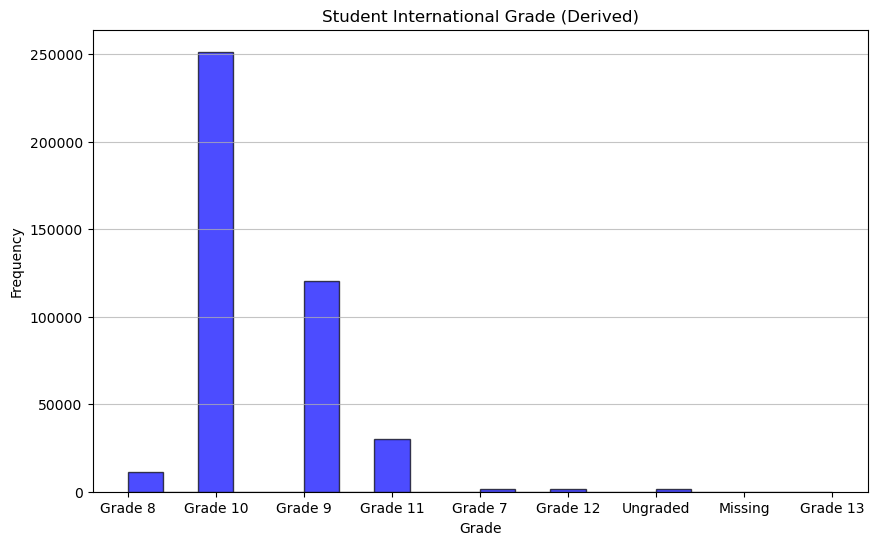

In [51]:
# Plotting a histogram
generate_histogram(df2, 'Student International Grade (Derived)', bins=20, title='Student International Grade (Derived)',xlabel='Grade')

OBSERVATION 1. There are primarily Grade 9 and 10 students

In [56]:
def plot_count_plot(df, column, title='Count Plot', xlabel='Categories', ylabel='Count'):
    plt.figure(figsize=(10, 6))
    ax = sb.countplot(data=df, x=column, palette='viridis')
    
    # Adding the count on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    rotation=0)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

QUESTION 2. Whether genders are fairly represented in the dataset

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2168033590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=df, x=column, palette='viridis')


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

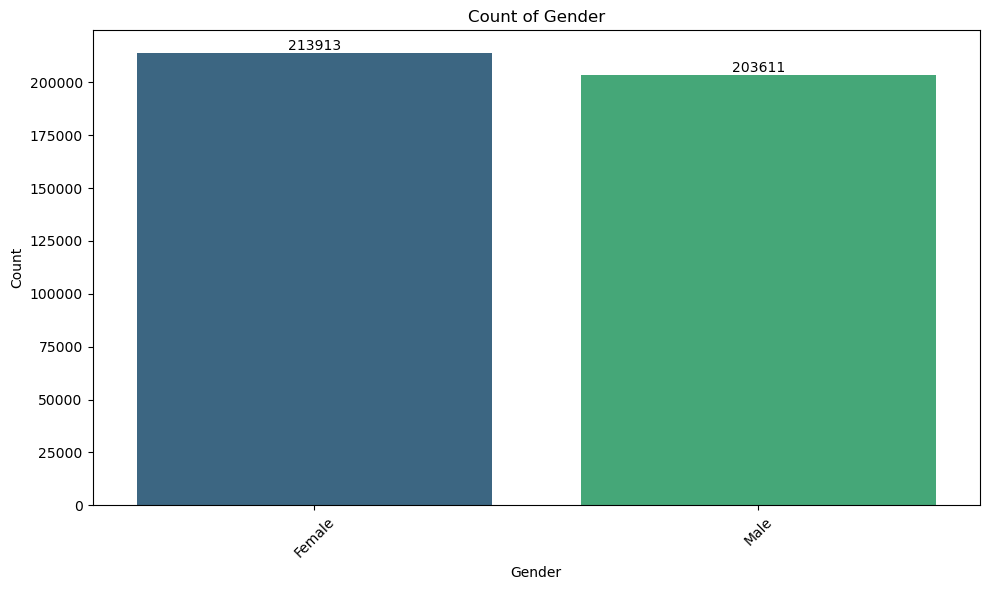

In [57]:
plot_count_plot(df2, 'Student (Standardized) Gender', title='Count of Gender',xlabel='Gender')

OBSERVATION 2. Females represent 51%, while Male - 49% from the total, which is assumed to be fairly represented given that data size of the responses.

In [65]:
def plot_scrollable_horizontal_bar_chart(df, column, title='Scrollable Horizontal Bar Chart'):
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    
    # Sort the DataFrame by Count in descending order
    value_counts = value_counts.sort_values(by='Count', ascending=True)
    
    # Create the horizontal bar chart
    fig = px.bar(value_counts, 
                 y=column, 
                 x='Count', 
                 orientation='h', 
                 title=title,
                 labels={column: 'Categories', 'Count': 'Count'})
    
    # Update layout for better scrolling
    fig.update_layout(yaxis=dict(tickmode='linear'), 
                      xaxis_title='Count', 
                      yaxis_title='Categories',
                      height=1200,
                      width=800)

    # Show the plot
    fig.show()

QUESTION 3. Which countries are in scope?

In [68]:
# count of unique countries
df2['Country code 3-character'].nunique()

73

**NOTE**. We have generated two similar plots below one for more interactivity and other to make it visible in HTML

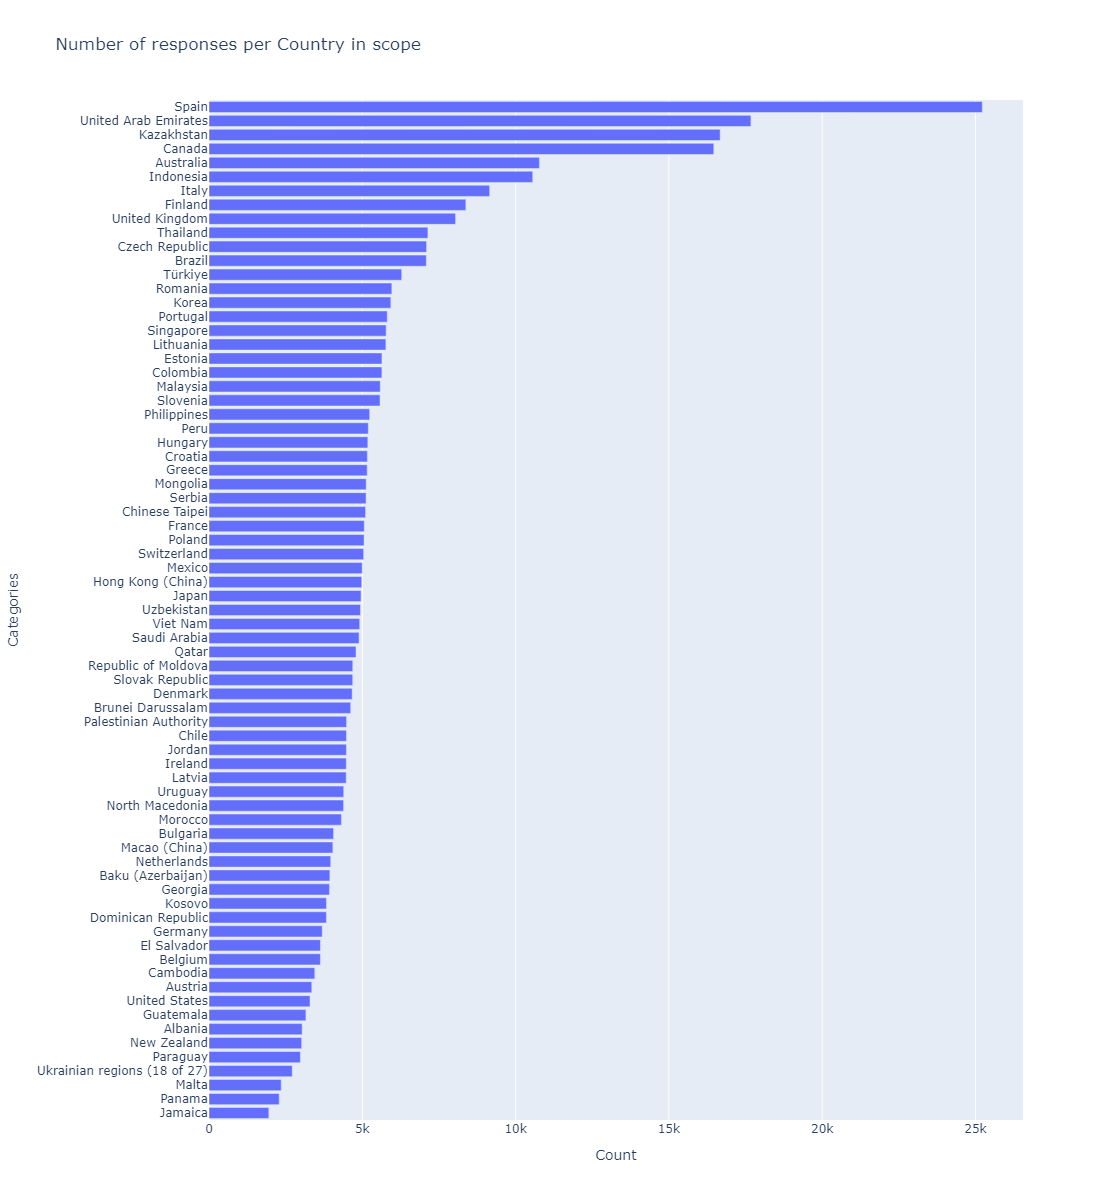

In [69]:
plot_scrollable_horizontal_bar_chart(df2, 'Country code 3-character', title='Number of responses per Country in scope')

In [275]:
def plot_horizontal_bar_chart(df, column, title='Horizontal Bar Chart', xlabel='Count', ylabel='Categories', bar_width=0.5):
    plt.figure(figsize=(10, 16))
    
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    
    # Sort the DataFrame by Count in descending order
    value_counts = value_counts.sort_values(by='Count', ascending=False)
    
    # Create the horizontal bar chart
    ax = sns.barplot(data=value_counts, y=column, x='Count', palette='viridis', orient='h', width=bar_width)
    
    # Adding the count on the right side of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', 
                    fontsize=10, color='black', 
                    rotation=0)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\511630483.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




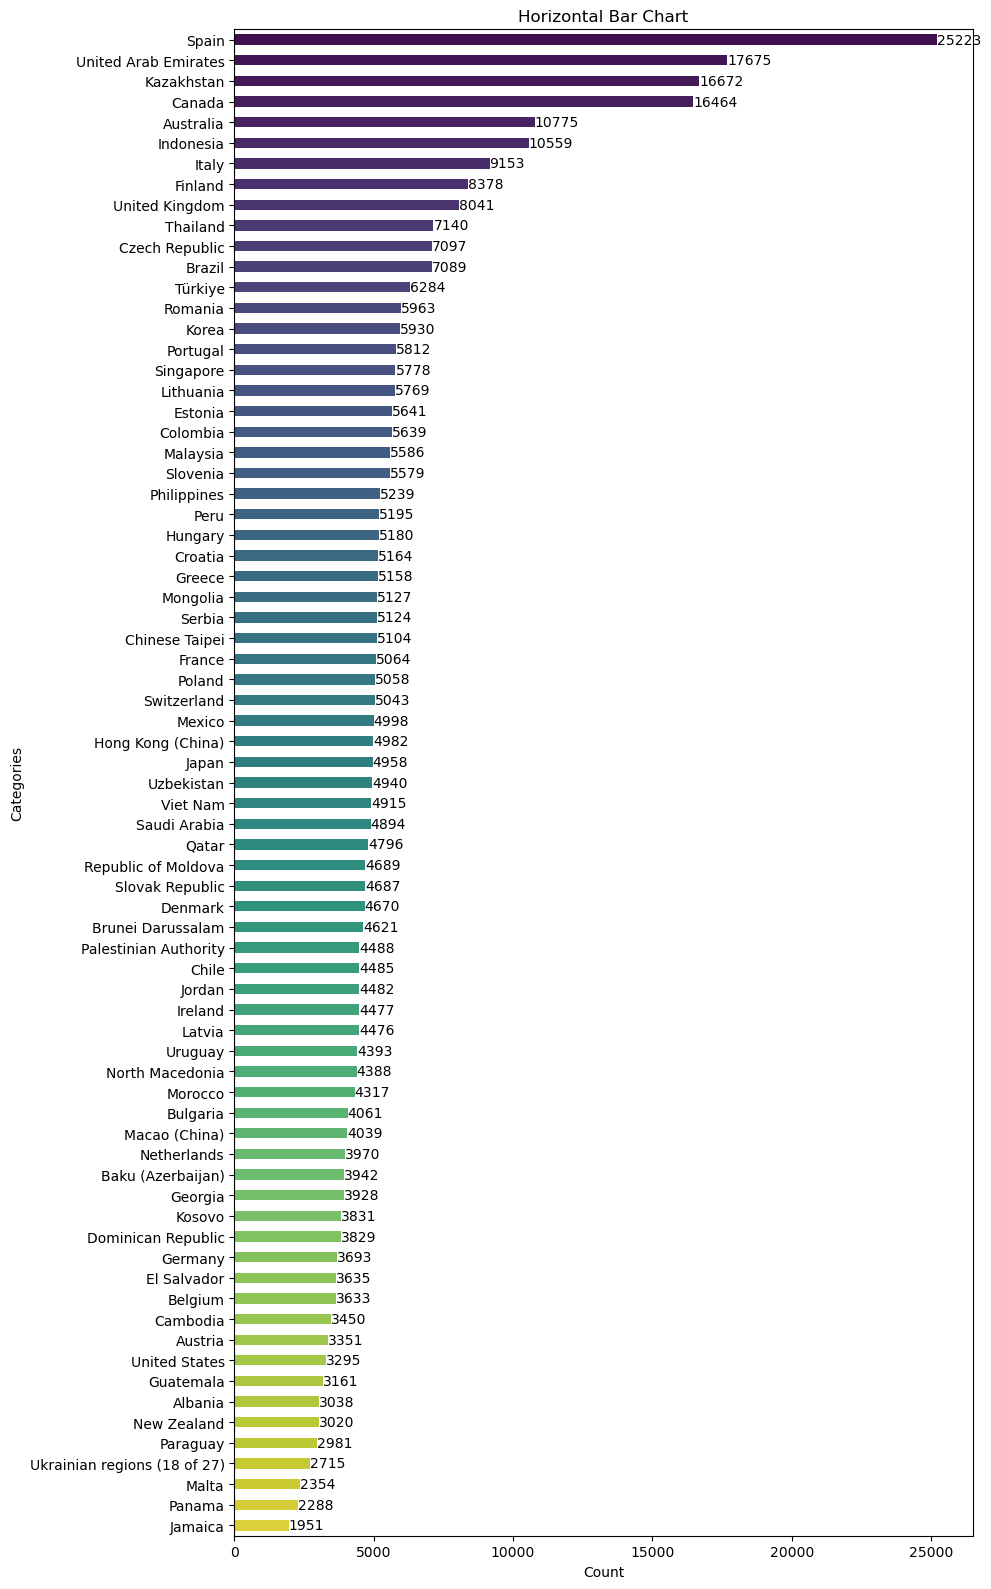

In [277]:
plot_horizontal_bar_chart(df2, 'Country code 3-character', bar_width=0.5)

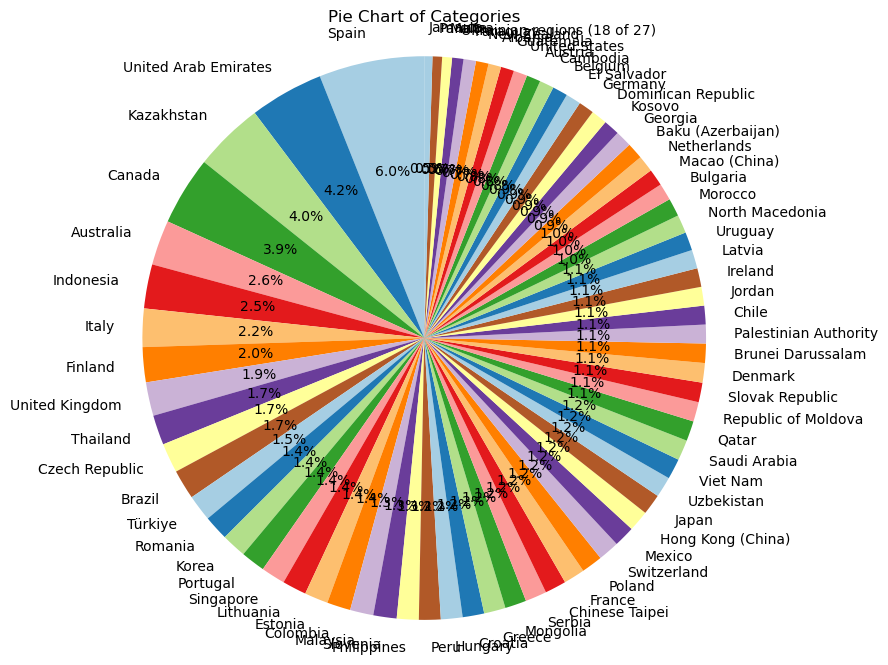

In [70]:
# Count occurrences of each unique value in the specified column
value_counts = df2['Country code 3-character'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, 
        labels=value_counts.index, 
        autopct='%1.1f%%',  
        startangle=90,      
        colors=plt.cm.Paired.colors)  

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Pie Chart of Categories')
plt.show()

OBSERVATION 3. There are 73 countries, with majority of responses between 2k-10k, except Spain, UAE, Kazakhstan and Canada with responses between 10k-25k. Besides mentioned 4 countries, responses are more or less fairly distributed between countries as a % from the total.

Although not all the countries in the World are part of the analysis.

In [77]:
def plot_bar_chart_single_column(df, column, title='Bar Chart', xlabel='Categories', ylabel='Count', custom_order=None):
    plt.figure(figsize=(10, 6))
    
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    
    # If a custom order is provided, sort the DataFrame accordingly
    if custom_order is not None:
        value_counts[column] = pd.Categorical(value_counts[column], categories=custom_order, ordered=True)
        value_counts = value_counts.sort_values(column)
    
    # Create the bar chart
    ax = sb.barplot(data=value_counts, x=column, y='Count', color='blue')

    # Adding the count on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    rotation=0)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

QUESTION 4. What is the distribution of number of days per week spent on Sport, Homework, Household chores, Work for Pay after school

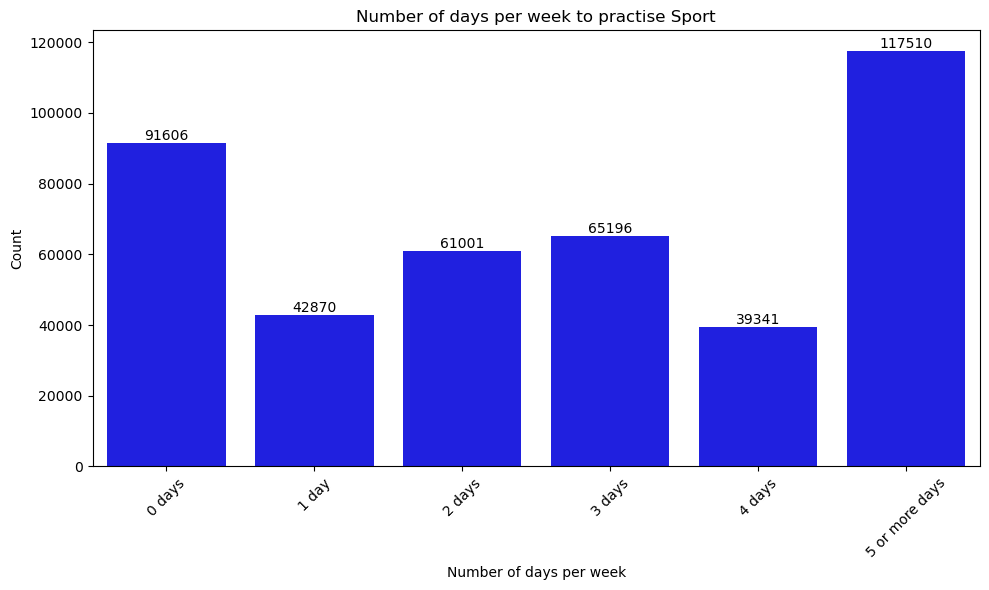

In [80]:
custom_order = ['0 days', '1 day', '2 days', '3 days', '4 days', '5 or more days']
plot_bar_chart_single_column(df2, 
                             'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])'
                            , title='Number of days per week to practise Sport',xlabel='Number of days per week',custom_order=custom_order)

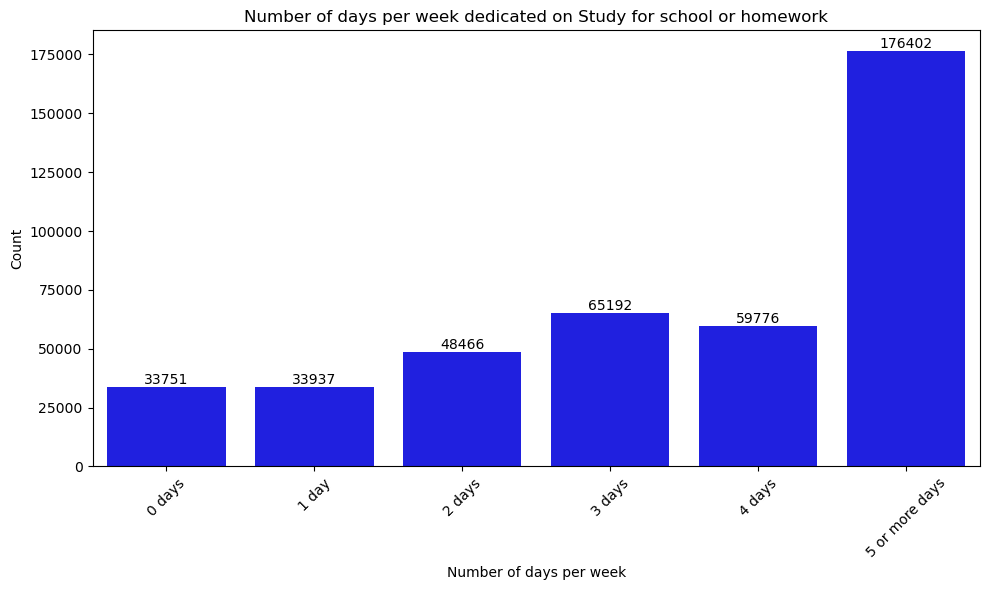

In [88]:
plot_bar_chart_single_column(df2, 
                             'How many days/wk after school: Study for school or homework'
                            , title='Number of days per week dedicated on Study for school or homework',xlabel='Number of days per week',custom_order=custom_order)

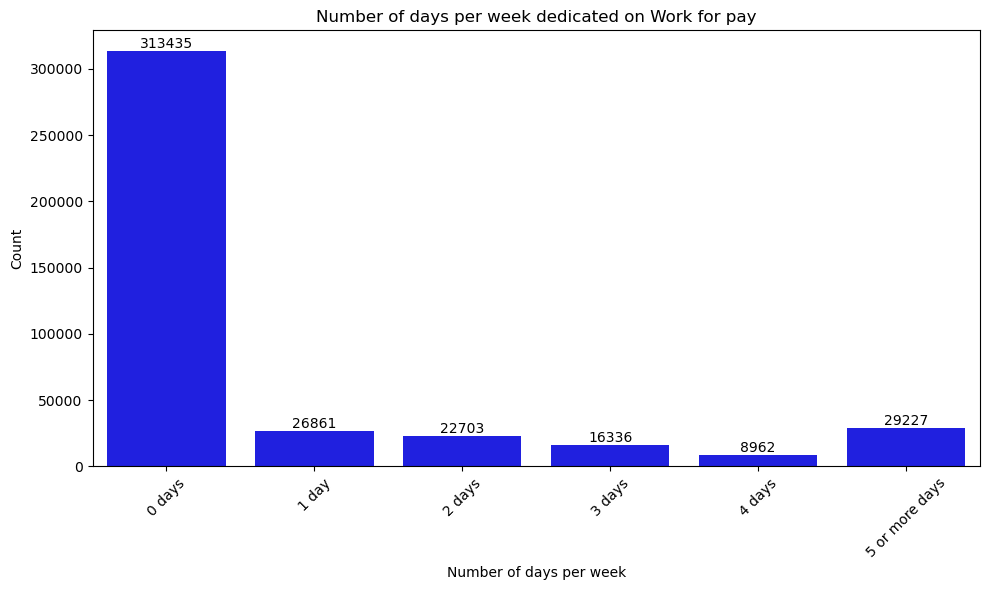

In [87]:
plot_bar_chart_single_column(df2, 
                             'How many days/wk after school: Work for pay'
                            , title='Number of days per week dedicated on Work for pay',xlabel='Number of days per week',custom_order=custom_order)

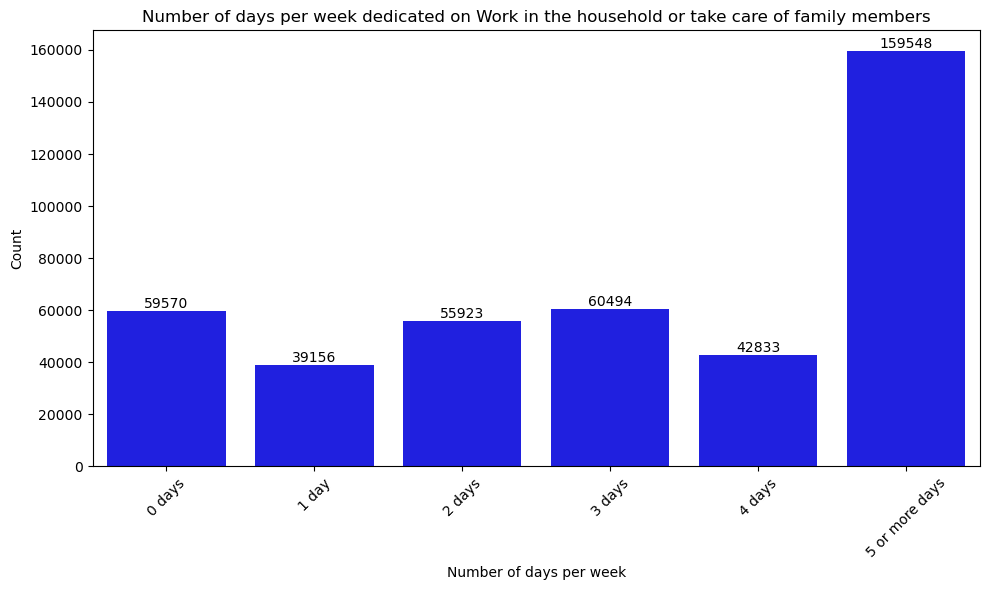

In [86]:
plot_bar_chart_single_column(df2, 
                             'How many days/wk after school: Work in the household or take care of family members'
                            , title='Number of days per week dedicated on Work in the household or take care of family members',xlabel='Number of days per week',custom_order=custom_order)

OBSERVATION 4. Distribution during a week on days dedicated on Sports varies significantly, while generally students tend to spend 5 or more days to do homework for their studies and household chores, while zero to Work for pay in majority of cases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We have to perform various transformations of data and go back to the intial steps to ensure that we have:
>> picked the right set of questions (~30 out of original >1,200)
>> 
>> cleaned data accordingly, due to missing values
>> 
>> tranformed data in a way that is understandable to readers, with correct labeling of questions and answers (which was not the case in the uncleaned data)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As was mentioned above, the initial data had to be significantly transformed, cleaned, mapped with additional dataset and filtered to be ready for the analysis.

## Bivariate Exploration

In [111]:
def plot_bubble_chart(df, col1, col2, ascending_x=True, ascending_y=True, title=None):
    """
    Create a bubble plot with sizes reflecting the number of observations for each unique combination
    of the specified columns.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.
    ascending_x (bool, optional): If True, order the x-axis in ascending order. Default is True.
    ascending_y (bool, optional): If True, order the y-axis in ascending order. Default is True.
    title (str, optional): Custom title for the plot. If None, a default title will be used.
    """
    # Count the number of observations for each unique combination of col1 and col2
    counts = df.groupby([col1, col2]).size().reset_index(name='Count')

    # Sort counts DataFrame for ordering
    counts = counts.sort_values(by=[col1, col2], ascending=[ascending_x, ascending_y])

    # Create the bubble plot
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=counts, x=col1, y=col2, size='Count', sizes=(50, 500), alpha=0.7)
    
    if title is None:
        title = f'Bubble Plot of {col1} vs {col2} with Size Reflecting Number of Observations'
    plt.title(title)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.legend(title='Number of Observations', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

QUESTION 5. How many days generally students spend on doing sports and homework

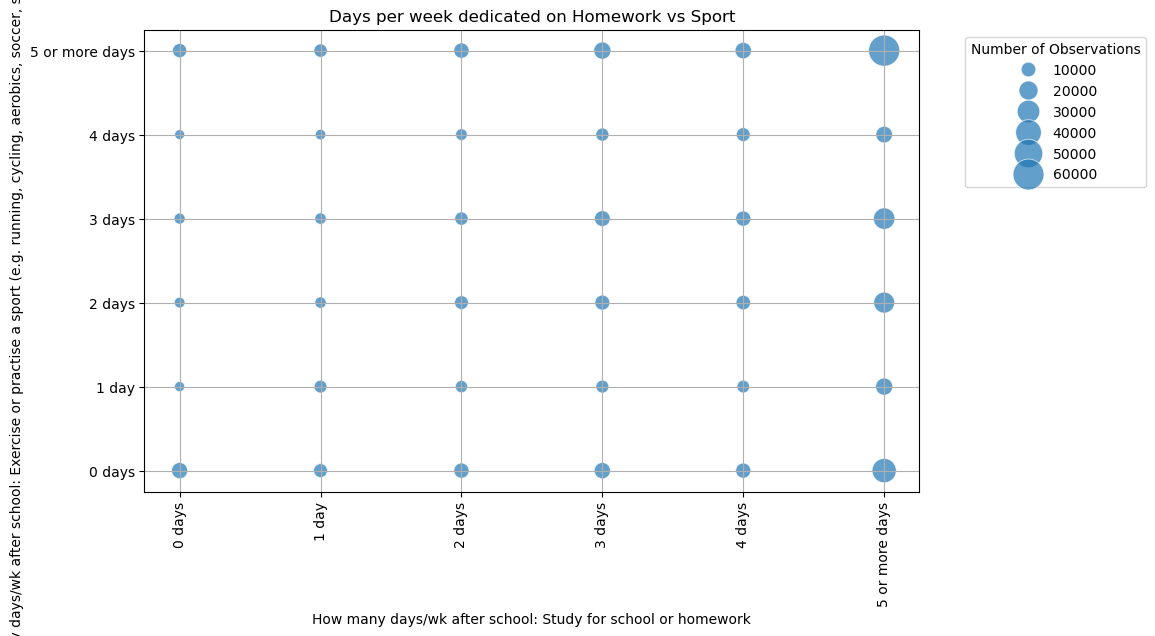

In [115]:
plot_bubble_chart(df2, 'How many days/wk after school: Study for school or homework',
                  'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])', 
                  ascending_x=True, ascending_y=False, title='Days per week dedicated on Homework vs Sport')

OBSERVATION 5. Kids who spend 5 or more days on doing Homework can also spend the same number of days per week on doing sports. 

From the above one could say that doing sports generally do not negatively affect number of days spend on doing homework.

QUESTION 6. What is the relationship of days dedicated to do Sports vs Household chores

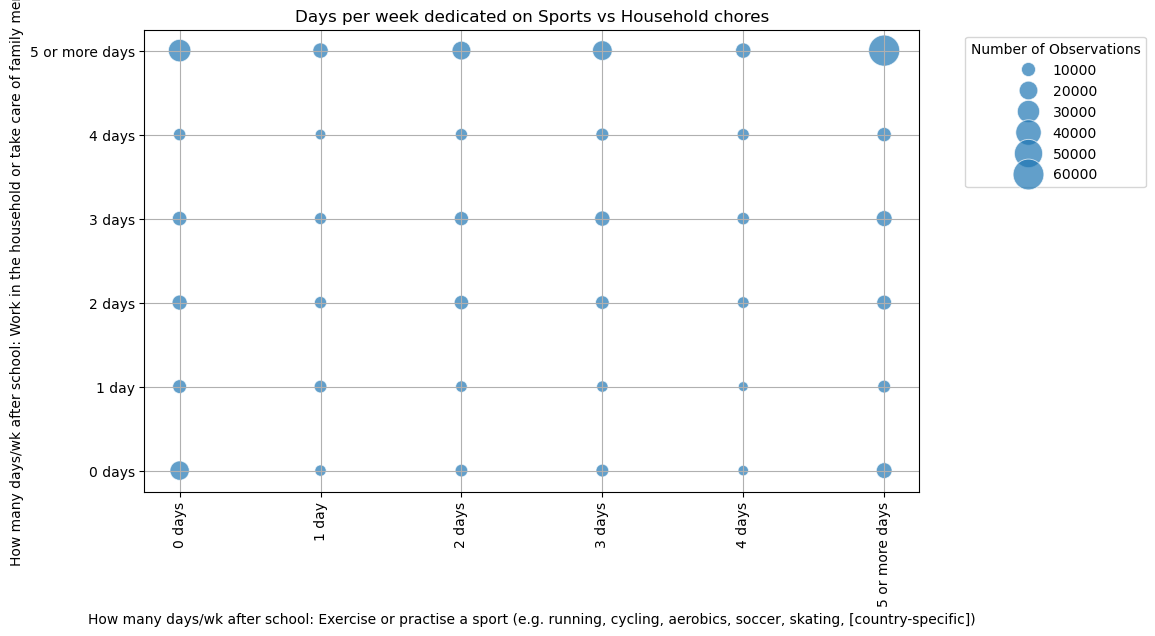

In [118]:
plot_bubble_chart(df2, 'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])', 
                  'How many days/wk after school: Work in the household or take care of family members',
                  ascending_x=True, ascending_y=False, title='Days per week dedicated on Sports vs Household chores')

OBSERVATION 6. The biggest group of students are kids doing sports and household chores >5 days a week, the second biggest group is kids doing no sports, but household chores >5 days a week.

OBSERVATION 7. Generally children spend more days on doing household chores than Sports.

QUESTION 8. Is there a relationship of Household work and number of siblings

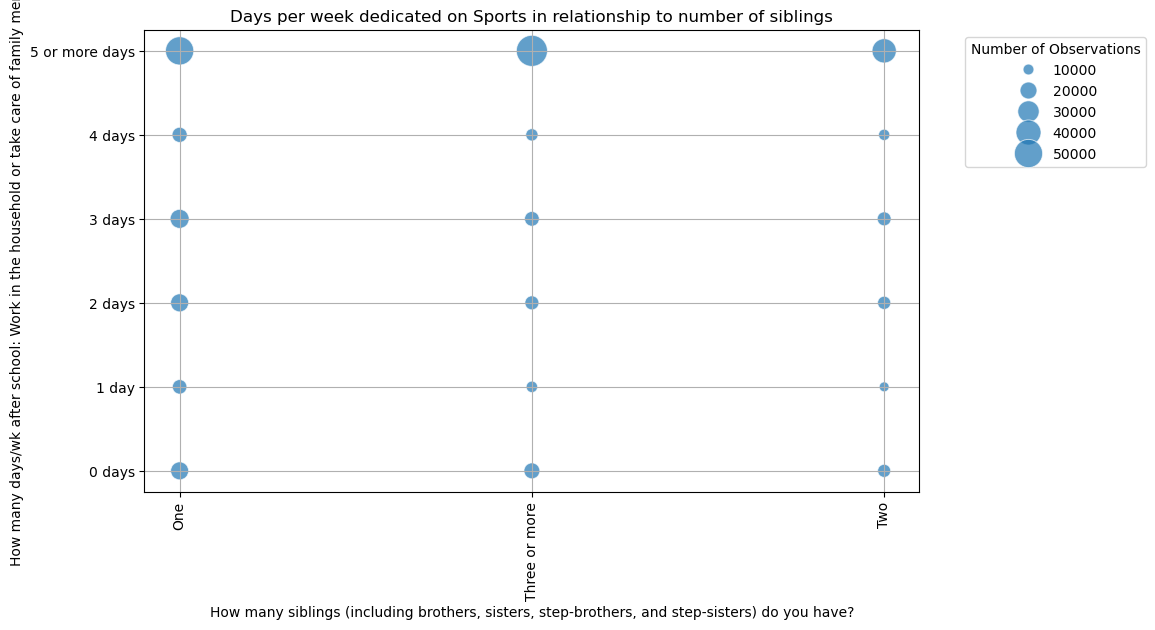

In [122]:
plot_bubble_chart(df2, 
                  'How many siblings (including brothers, sisters, step-brothers, and step-sisters) do you have?',
                  'How many days/wk after school: Work in the household or take care of family members', 
                  ascending_x=True, ascending_y=False, title='Days per week dedicated on Sports in relationship to number of siblings')

OBSERVATION 8. Kids with One or less siblings generally can dedicate less days on doing Household chores.

In [135]:
def plot_boxplot(df, category_col, value_col, title, xlabel, ylabel):
    """
    Create a box plot to visualize the distribution of a numerical variable across different categories.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    category_col (str): The name of the categorical column for grouping.
    value_col (str): The name of the numerical column to be plotted.
    """
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sb.boxplot(data=df, x=category_col, y=value_col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90) 
    plt.grid(True)
    plt.show()

QUESTION 9. Do gender play a role in number of days spend on homework, work for pay, sports and homework for studies

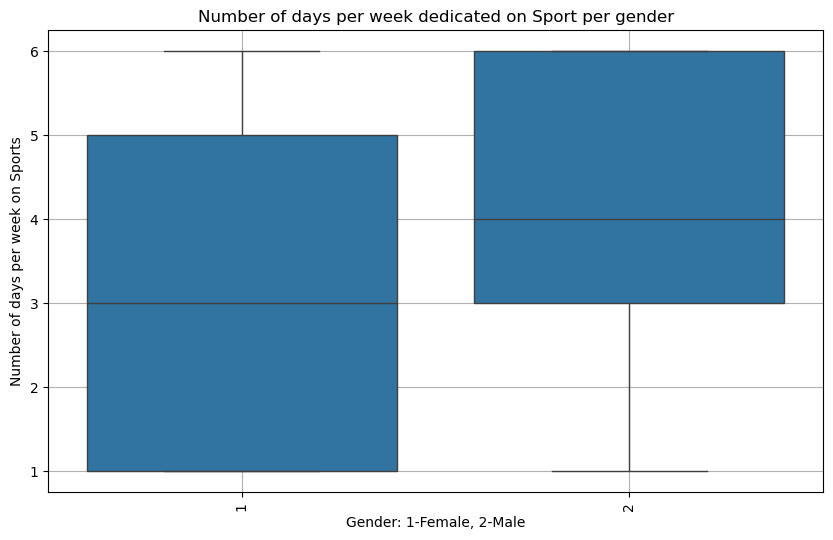

In [136]:
plot_boxplot(df_value, 
              category_col='Student (Standardized) Gender', 
              value_col='How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])',
            title='Number of days per week dedicated on Sport per gender',
            xlabel='Gender: 1-Female, 2-Male',
            ylabel='Number of days per week on Sports')

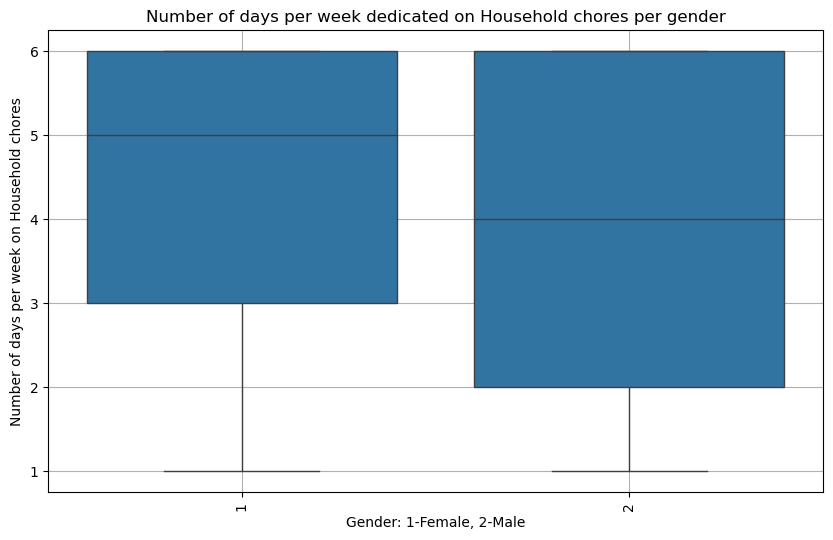

In [137]:
plot_boxplot(df_value, 
              category_col='Student (Standardized) Gender', 
              value_col='How many days/wk after school: Work in the household or take care of family members',
            title='Number of days per week dedicated on Household chores per gender',
            xlabel='Gender: 1-Female, 2-Male',
            ylabel='Number of days per week on Household chores')

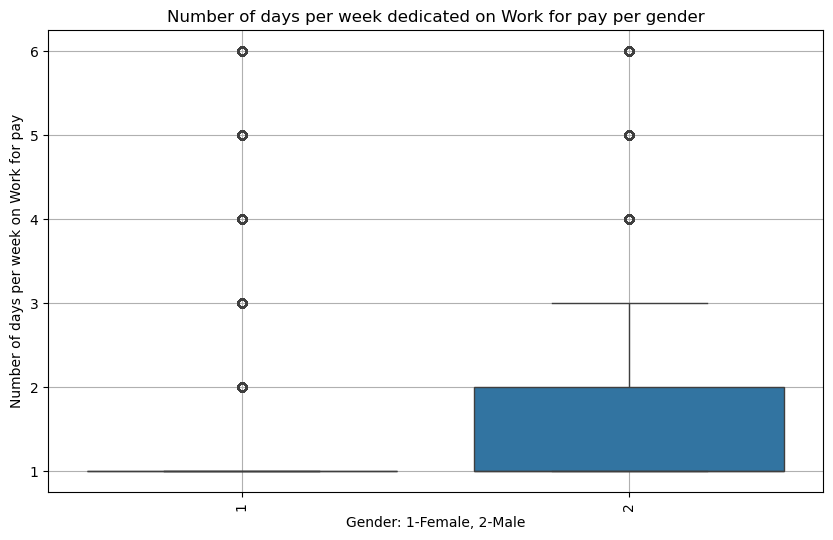

In [138]:
plot_boxplot(df_value, 
              category_col='Student (Standardized) Gender', 
              value_col='How many days/wk after school: Work for pay',
            title='Number of days per week dedicated on Work for pay per gender',
            xlabel='Gender: 1-Female, 2-Male',
            ylabel='Number of days per week on Work for pay')

OBSERVATION 9. Generally there seem to be a relationship of days dedicated on Sports, Household chores and Work for pay per gender of kids.
Boys in the observed dataset dedicate more time on doing Sports, while girls on Household chores and caring for family members. Work for pay has a similar trend of boys spending more time compared to girls on average on this activity.

In [141]:
def create_clustered_bar_chart_count(df, category_col1, category_col2, title,order_col2=None):
    """
    Create a clustered bar chart based on counts from two categorical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col1 (str): The first categorical column name (x-axis).
    category_col2 (str): The second categorical column name (hue).
    order_col2 (list, optional): Custom order for the second categorical column.

    Returns:
    None
    """
    # Ensure the input DataFrame has the required columns
    if category_col1 not in df.columns or category_col2 not in df.columns:
        raise ValueError("DataFrame must contain the specified columns.")

    # Create a count DataFrame
    count_df = df.groupby([category_col1, category_col2]).size().reset_index(name='count')

    # Create a clustered bar chart
    plt.figure(figsize=(10, 6))
    sb.barplot(data=count_df, x=category_col1, y='count', hue=category_col2, hue_order=order_col2)
    
    plt.title(title)
    plt.xlabel(category_col1)
    plt.ylabel('Count')
    plt.legend(title=category_col2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

QUESTION 10. Whether there is a difference on number of days per week spend on household work depending on number of siblings

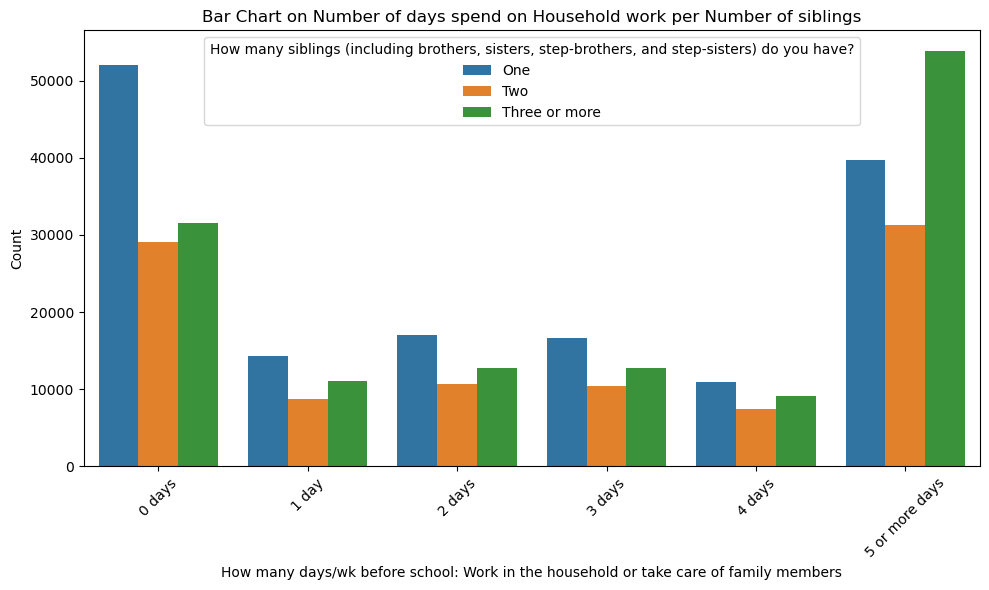

In [143]:
create_clustered_bar_chart_count(df2, 'How many days/wk before school: Work in the household or take care of family members',
                                 'How many siblings (including brothers, sisters, step-brothers, and step-sisters) do you have?',
                                 title='Bar Chart on Number of days spend on Household work per Number of siblings',
                                 order_col2=['One', 'Two', 'Three or more'])

OBSERVATION 10. Kids with 1 or less siblings generally have higher chance to dedicate 0 days on household work, while kids with Three or more siblings have a higher chance to dedicate Five or more days on doing household work.

This is also depicted in the Heatmap below

In [152]:
def create_heatmap_count(df, category_col1, category_col2, title, xlabel, ylabel, order_col1=None, order_col2=None):
    """
    Create a heatmap based on counts from two categorical columns with optional custom ordering.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col1 (str): The first categorical column name (rows).
    category_col2 (str): The second categorical column name (columns).
    order_col1 (list, optional): Custom order for the first categorical column.
    order_col2 (list, optional): Custom order for the second categorical column.

    Returns:
    None
    """
    # Ensure the input DataFrame has the required columns
    if category_col1 not in df.columns or category_col2 not in df.columns:
        raise ValueError("DataFrame must contain the specified columns.")

    # Create a count DataFrame using crosstab
    count_df = pd.crosstab(df[category_col1], df[category_col2])

    # Reindex the DataFrame if custom orders are provided
    if order_col1 is not None:
        count_df = count_df.reindex(order_col1, fill_value=0)
    if order_col2 is not None:
        count_df = count_df[order_col2]

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sb.heatmap(count_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

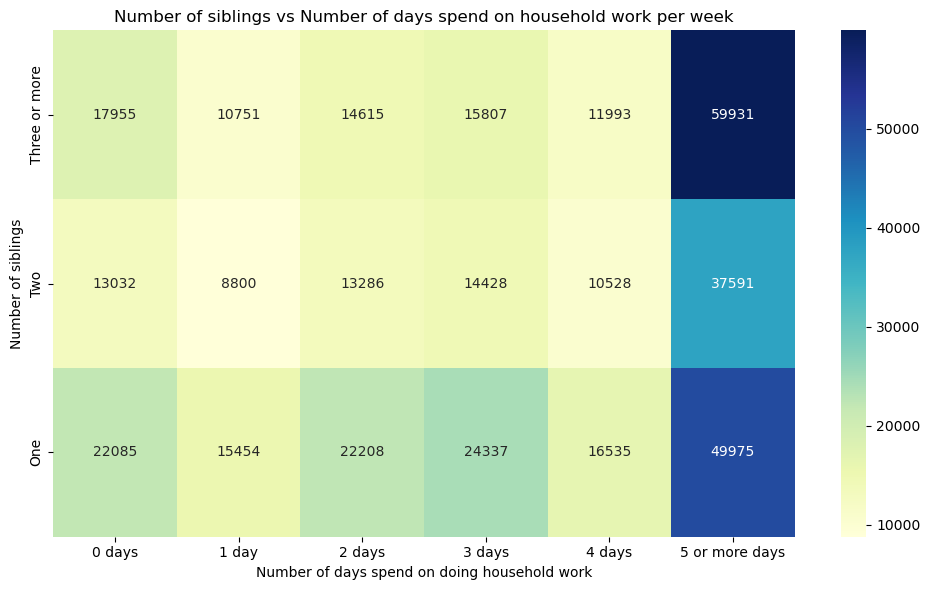

In [153]:
create_heatmap_count(df2, 'How many siblings (including brothers, sisters, step-brothers, and step-sisters) do you have?', 
                     'How many days/wk after school: Work in the household or take care of family members',
                     order_col1=['Three or more','Two','One'],
                    title='Number of siblings vs Number of days spend on household work per week',
                    xlabel = 'Number of days spend on doing household work',
                    ylabel = 'Number of siblings')

QUESTION 11. Whether higher number of musical instruments at home is seen in families with higher number of books

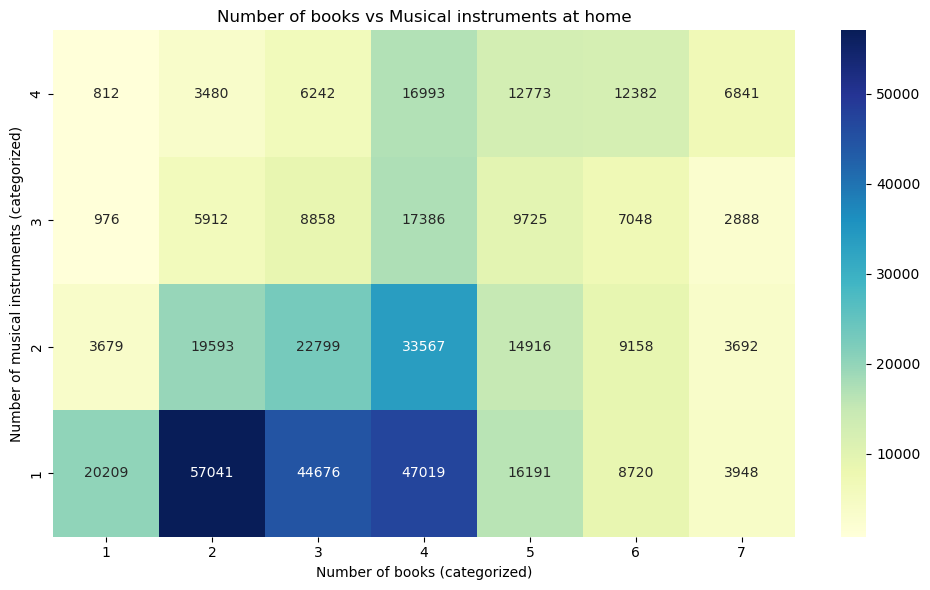

In [156]:
create_heatmap_count(df_value, 'How many of these items are there at your [home]: Musical instruments (e.g. guitar, piano, [country-specific example])', 
                     'How many books are there in your [home]?'
                     , title='Number of books vs Musical instruments at home',
                     xlabel='Number of books (categorized)',
                     ylabel='Number of musical instruments (categorized)',
                     order_col1=[4,3,2,1]
                    )

OBSERVATION 11. There seem to be a relationship of higher number of books and musical instruments at home, while families with fewer number of musical instruments generally have slightly higher chance of having books.

In [173]:
def create_violin_plot(df, category_col, value_col, ylabel, title, filter_categories=None):
    """
    Create a violin plot based on a categorical column and a continuous variable, with optional filtering.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col (str): The categorical column name (x-axis).
    value_col (str): The continuous variable column name (y-axis).
    filter_categories (list, optional): List of categories to include in the plot.

    Returns:
    None
    """
    # Ensure the input DataFrame has the required columns
    if category_col not in df.columns or value_col not in df.columns:
        raise ValueError("DataFrame must contain the specified columns.")

    # Filter the DataFrame based on specified categories if provided
    if filter_categories is not None:
        df = df[df[category_col].isin(filter_categories)]

    # Create a violin plot
    plt.figure(figsize=(10, 6))
    sb.violinplot(data=df, x=category_col, y=value_col, inner='quartile', palette='muted')

    plt.title(title)
    plt.xlabel(category_col)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

QUESTION 12. Whether with grades, patterns to spend days per week on Sport activities changes

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2758928136.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




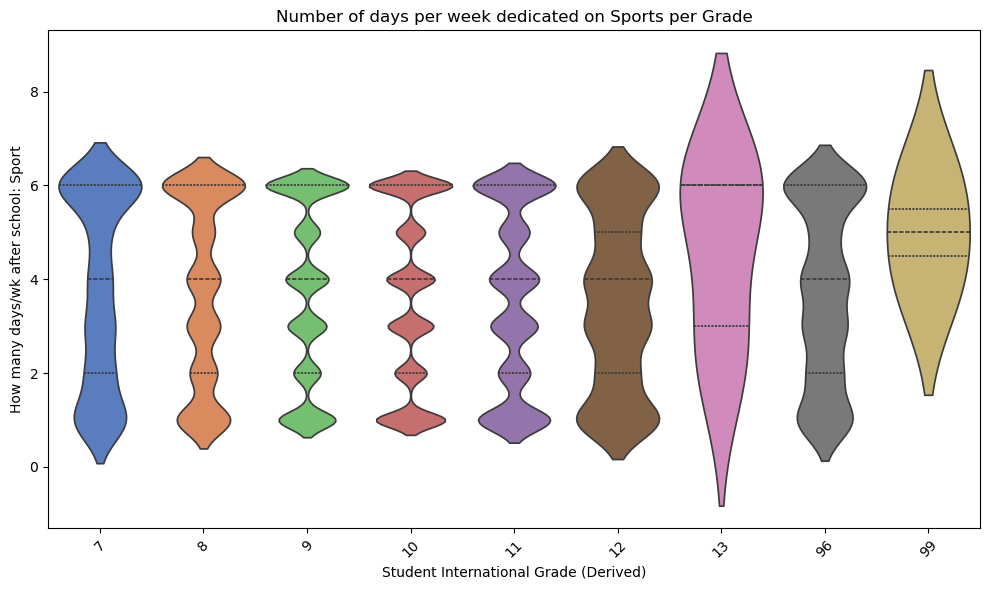

In [174]:
create_violin_plot(df_value, 'Student International Grade (Derived)', 
                   'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])',
                  ylabel='How many days/wk after school: Sport',
                  title='Number of days per week dedicated on Sports per Grade')

OBSERVATION 12. In grade 12 (in comparison with grade 8-11), number of days per week spend on Sports seem to be more evenly distributed. One could say that in Grade 12 kids start to spend less days on sports compared to earlier grades.

QUESTION 13. Whether with grades, patterns to spend days per week on Household work changes

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2758928136.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




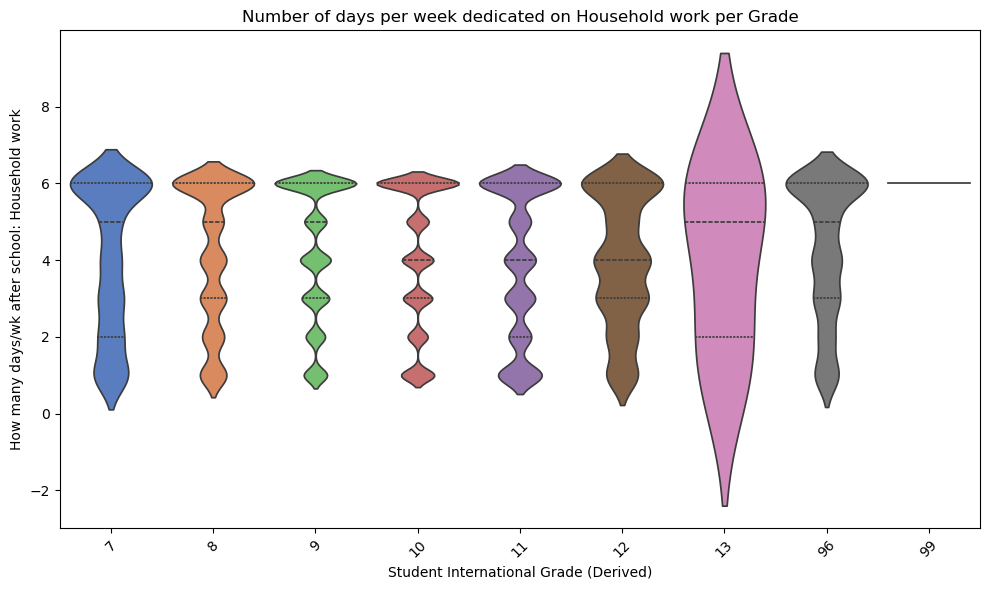

In [175]:
create_violin_plot(df_value, 'Student International Grade (Derived)', 
                   'How many days/wk after school: Work in the household or take care of family members',
                  ylabel='How many days/wk after school: Household work',
                  title='Number of days per week dedicated on Household work per Grade')

OBSEERVATION 13. Most of the kids in all grades spend more than 5 days a week on doing household work.

QUESTION 14. Whether number of days spend on different activities varies per country

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2758928136.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




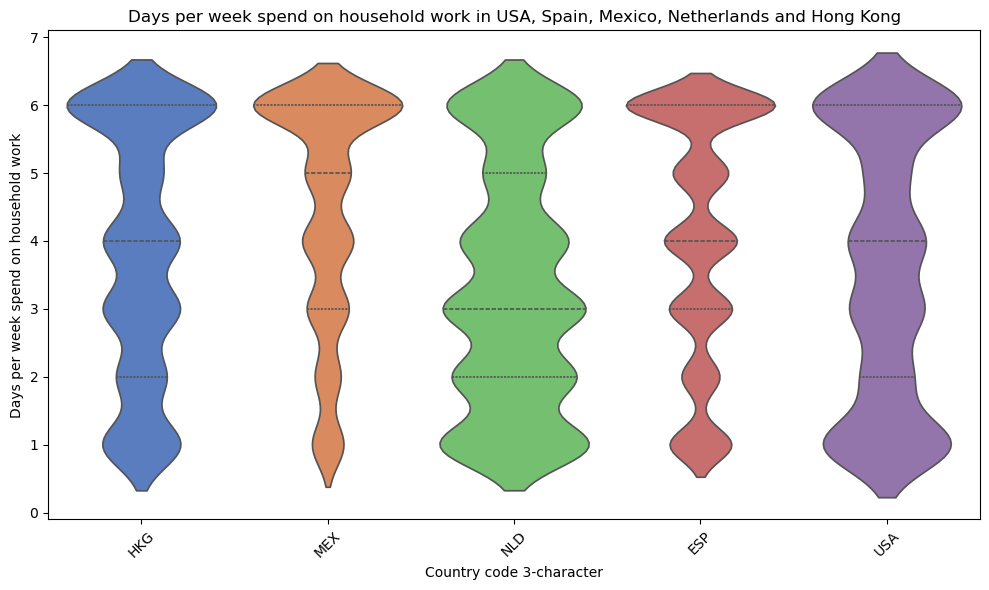

In [177]:
create_violin_plot(df_value, 'Country code 3-character', 'How many days/wk after school: Work in the household or take care of family members',
                   title='Days per week spend on household work in USA, Spain, Mexico, Netherlands and Hong Kong',
                   ylabel='Days per week spend on household work',
                  filter_categories=['USA', 'ESP','MEX','NLD','HKG'])

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2758928136.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




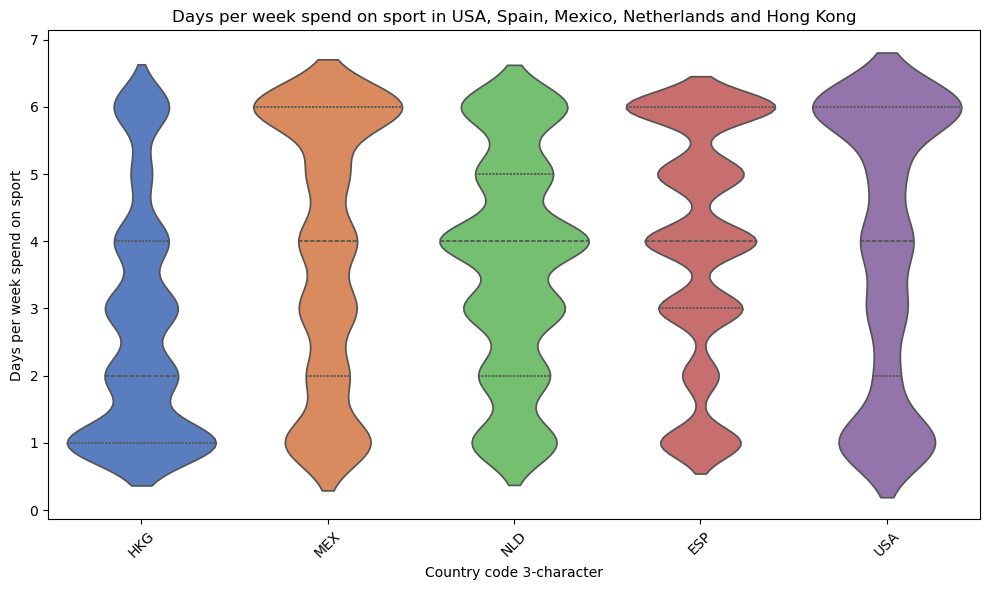

In [178]:
create_violin_plot(df_value, 'Country code 3-character', 'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])',
                   title='Days per week spend on sport in USA, Spain, Mexico, Netherlands and Hong Kong',
                   ylabel='Days per week spend on sport',
                  filter_categories=['USA', 'ESP','MEX','NLD','HKG'])

C:\Users\gcfoj\AppData\Local\Temp\ipykernel_27976\2758928136.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




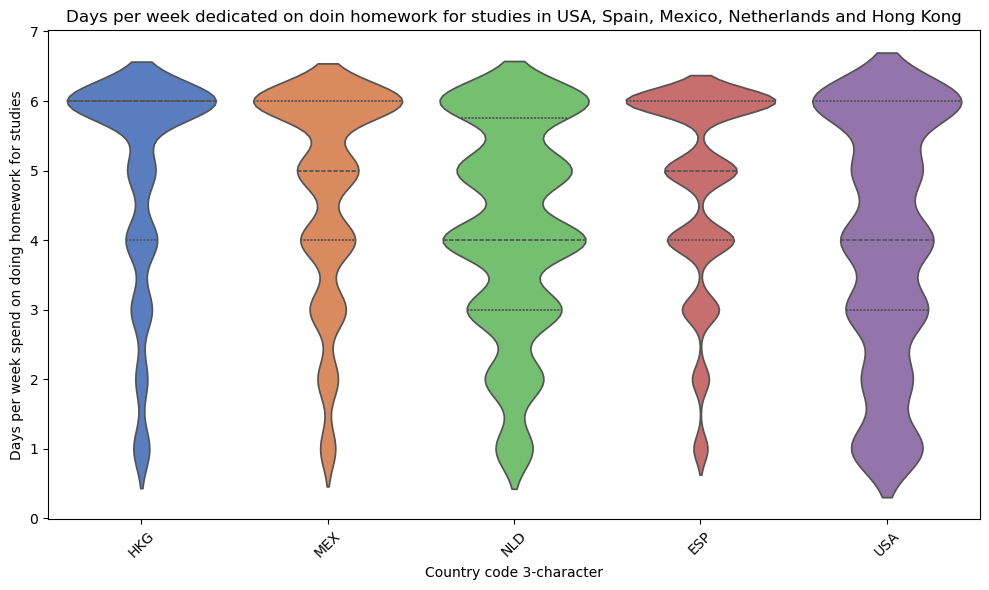

In [181]:
create_violin_plot(df_value, 'Country code 3-character', 'How many days/wk after school: Study for school or homework',
                   title='Days per week dedicated on doin homework for studies in USA, Spain, Mexico, Netherlands and Hong Kong',
                   ylabel='Days per week spend on doing homework for studies',
                  filter_categories=['USA', 'ESP','MEX','NLD','HKG'])

OBSERVATION 14. There are differences in how kids spend their time per country as per above. From the selected countries, in Hong Kong, Mexico and Spain kids dedicate more days on doing household work and homework for studies compared to Netherlands and USA. In Hong kong kids spend less days on doing sports.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Gender, Country and Grade seem to be an important features in relationship of how many days kids dedicate on various activities.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Number of siblings impacts certain aspects of kids life.

## Multivariate Exploration

In [247]:
def create_count_heatmaps(df, x_col, y_col, country_col, selected_countries, xlabel, ylabel, x_sort='asc', y_sort='asc'):
    # Check if the required columns exist in the DataFrame
    required_columns = [x_col, y_col, country_col]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"{col} is not in the DataFrame.")
    
    # Loop through each selected country
    for country in selected_countries:
        # Filter the DataFrame for the current country
        df_filtered = df[df[country_col] == country]
        
        # Check if there are any data points for the current country
        if df_filtered.empty:
            print(f"No data available for {country}. Skipping.")
            continue
        
        # Create a pivot table for counting occurrences
        pivot_table = df_filtered.pivot_table(index=y_col, columns=x_col, aggfunc='size', fill_value=0)

        # Sort the index (y-axis) and columns (x-axis) if specified
        if y_sort == 'asc':
            pivot_table = pivot_table.sort_index(ascending=True)
        elif y_sort == 'desc':
            pivot_table = pivot_table.sort_index(ascending=False)

        if x_sort == 'asc':
            pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)
        elif x_sort == 'desc':
            pivot_table = pivot_table.reindex(sorted(pivot_table.columns, reverse=True), axis=1)

        # Create a heatmap
        plt.figure(figsize=(6, 3))
        sb.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm', cbar_kws={'label': 'Count'})
        
        plt.title(f'Count Heatmap of {xlabel} vs {ylabel} for {country}')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

QUESTION 15. How different on average availability of musical instruments and books in 5 selected countries (USA, Spain, Mexico, Netherlands and Hong Kong) for kids

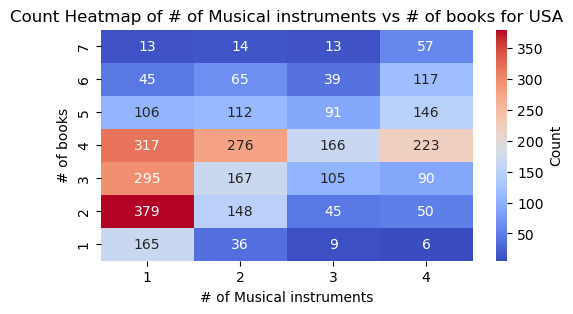

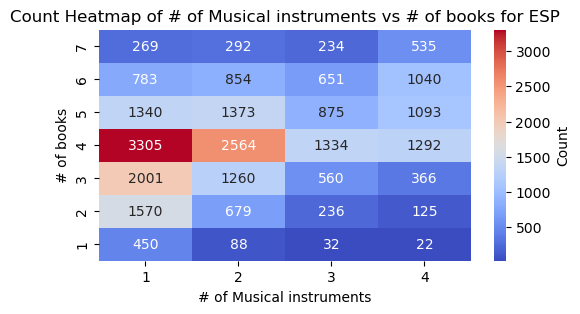

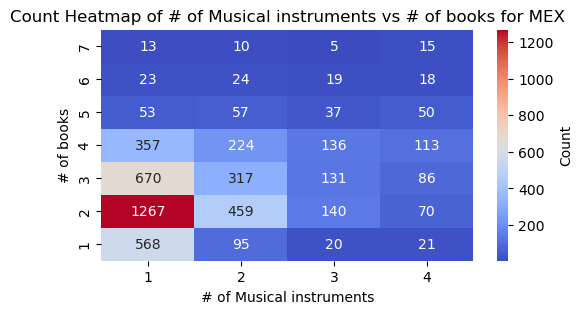

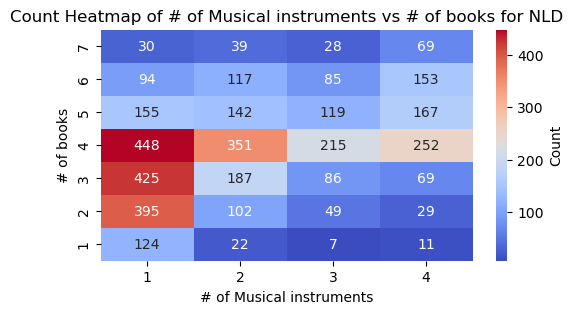

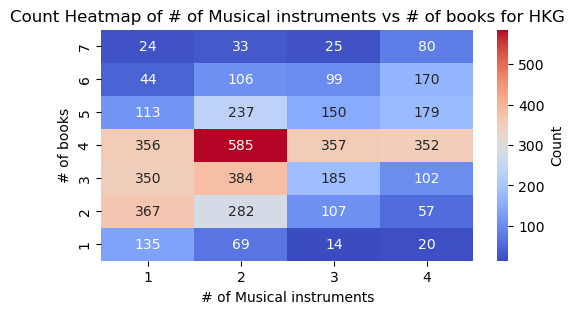

In [248]:
selected_countries = ['USA', 'ESP','MEX','NLD','HKG']
create_count_heatmaps(df_value, 'How many of these items are there at your [home]: Musical instruments (e.g. guitar, piano, [country-specific example])', 
                      'How many books are there in your [home]?', 'Country code 3-character', 
                      selected_countries, 
                      xlabel = '# of Musical instruments',
                     ylabel='# of books', x_sort='asc', y_sort='desc')

OBSERVATION 15. In Mexico kids on average seem to have fewer musical instruments and books compared to other countries in scope. Generally there are differences at country level on availability of musical instruments and books for kids at home.

QUESTION 16. How different number of days spend on Sports and Household chores are for selected countries

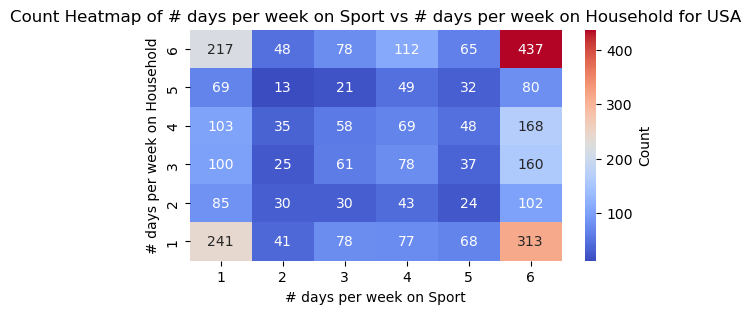

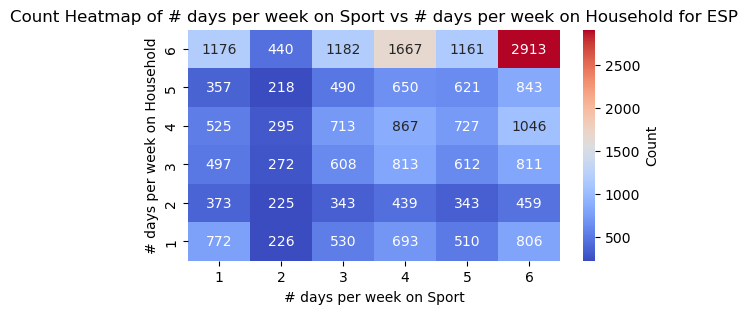

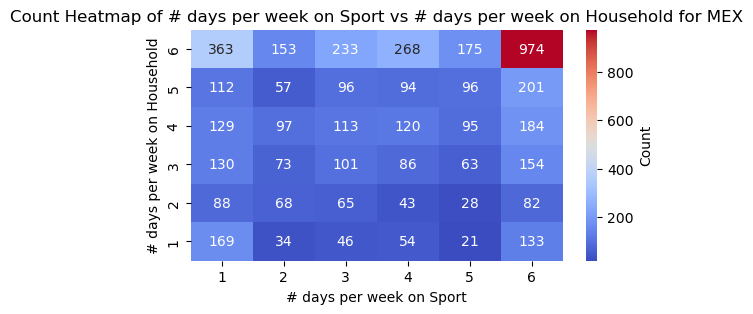

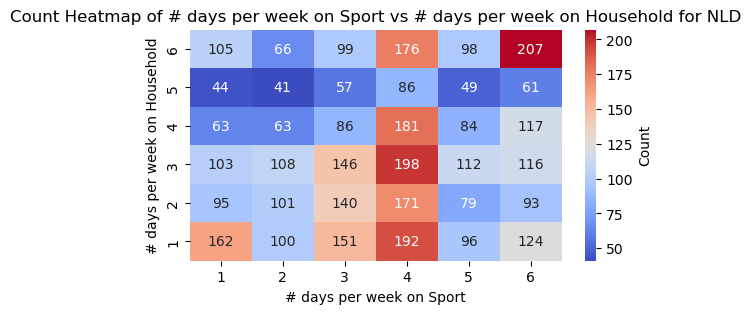

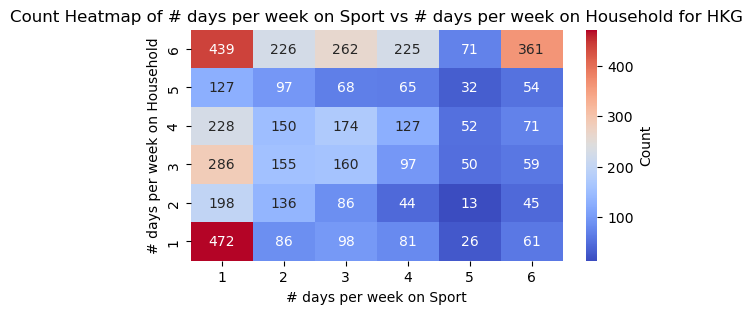

In [249]:
selected_countries = ['USA', 'ESP','MEX','NLD','HKG']
create_count_heatmaps(df_value, 'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])', 
                      'How many days/wk after school: Work in the household or take care of family members', 'Country code 3-character', 
                      selected_countries, 
                      xlabel = '# days per week on Sport',
                     ylabel='# days per week on Household', x_sort='asc', y_sort='desc')

OBSERVATION 16. Number of days spend on Sports and Household chores seem to be more spread in the Netherlands, while in Hong Kong as was mentioned previously kids dedicate less days on average for doing sports.

In [265]:
def plot_boxplot_per_country(df, category_col, value_col, title, xlabel, ylabel, countries):
    """
    Create box plots to visualize the distribution of a numerical variable across categories,
    separately for a list of countries.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    category_col (str): The name of the categorical column for grouping.
    value_col (str): The name of the numerical column to be plotted.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    countries (list): A list of country codes to filter the DataFrame.
    """
    for country in countries:
        # Filter the DataFrame for the selected country
        filtered_df = df[df['Country code 3-character'] == country]
        
        # Create the box plot
        plt.figure(figsize=(6, 3))
        sb.boxplot(data=filtered_df, x=category_col, y=value_col)
        plt.title(f"{title} - {country}")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=90) 
        plt.grid(True)
        plt.show()

QUESTION 17. Whether difference in number of days dedicated on Sport per gender is consistent for the selected countries.

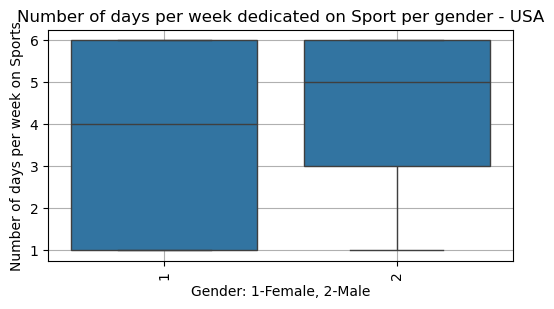

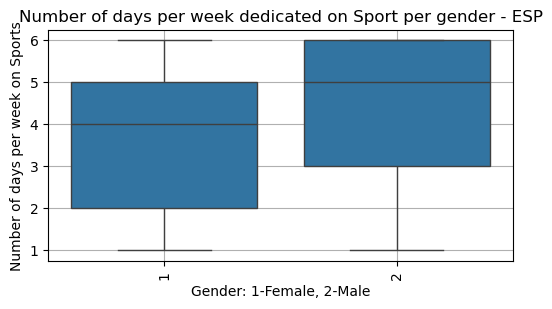

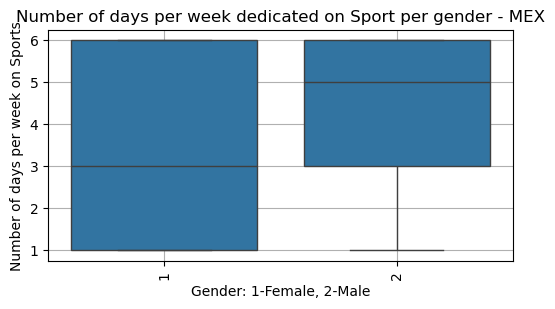

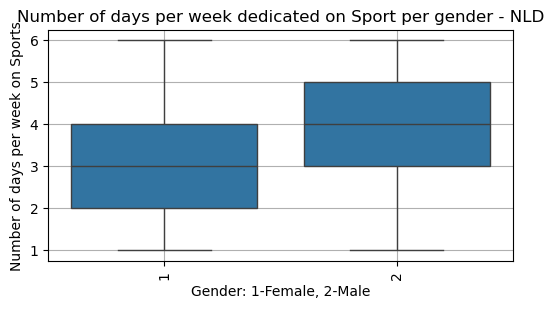

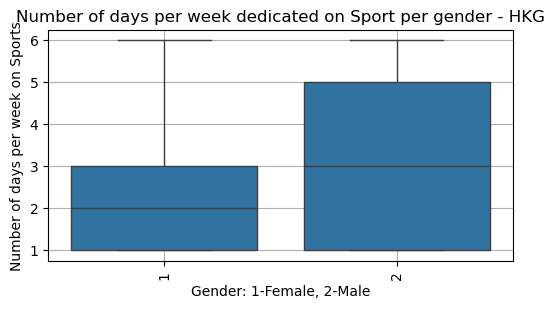

In [266]:
countries = ['USA', 'ESP','MEX','NLD','HKG'] 
plot_boxplot_per_country(df_value, 
                         category_col='Student (Standardized) Gender', 
                         value_col='How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])',
                         title='Number of days per week dedicated on Sport per gender',
                         xlabel='Gender: 1-Female, 2-Male',
                         ylabel='Number of days per week on Sports',
                         countries=countries)

OBSERVATION 17. Girls consistently dedicate less days in a week on Sport than boys in all the selected countries.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> How kids spend their time seems to be dependant not only from gender, but also country, where we can see certain trends and impact of where a child is raised on the number of days dedicated to sports etc.

### Were there any interesting or surprising interactions between features?

> From the selected countries USA and the Netherlands seem to be closer to each other compared to Mexico, Spain and Hong Kong on number of days per week used for doing homework and household chores.

## Conclusions
> There are primarily Grade 9 and 10 students, with fairly similar number of girls and boys in 73 countries, with majority of responses between 2k-10k, except Spain, UAE, Kazakhstan and Canada with responses above 10k.
>
> Generally students tend to spend 5 or more days to do homework for their studies and household chores, while zero to Work for pay in majority of cases.
>> Kids who spend 5 or more days on doing Homework can also spend the same number of days per week on doing sports. From the above one could say that doing sports generally do not negatively affect number of days spend on doing homework.
>> 
>> Generally children spend more days on doing household chores than Sports.
>> 
>> Kids with One or less siblings generally can dedicate less days on doing Household chores.
>> 
> Gender seems to play a certain role in number of days dedicated on certain activities:
>> Boys in the observed dataset dedicate more time on doing Sports, while girls on Household chores and caring for family members.
>>
>> Work for pay has a similar trend of boys spending more time compared to girls on average on this activity.
>>
> There seem to be a relationship of higher number of books and musical instruments at home.
> 
> There are differences in how kids spend their time per country in Spain, USA, Hong Kong, Mexico and the Netherlands.
> > From the selected countries, in Hong Kong, Mexico and Spain kids dedicate more days on doing household work and homework for studies compared to Netherlands and USA. In Hong Kong kids spend less days on doing sports.
> > 
> > In Mexico kids on average seem to have fewer musical instruments and books compared to other countries in scope. Generally there are differences at country level on availability of musical instruments and books for kids at home.
> > 
>> Girls consistently dedicate less days in a week than boys on Sport in all the selected countries.
> >
> PISA 2022 is a great database to perform deep analysis on how kids are being raised, in incorporation with their grades, teacher and parent questionnaires more insihts can be derived from it. Similar and additional analysis could be performed to a larger number of countries. However, more research and analysis time should be dedicated to qualitatively analyze PISA 2022 results.

